# 1.Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Import Data

In [2]:
Data=pd.read_csv('gas_turbines (1).csv')
Data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# 3.Data Preprocessing & EDA

In [3]:
Data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
# Changing position of target column 'TEY'
Target = Data['TEY']
#Drop the existing column
Data.drop(labels=['TEY'], axis=1,inplace = True)
Data.insert(0, 'Y', Target)

Data = Data.rename({'Y':'TEY'}, axis = 1)

Data.head()


,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
Data.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


### We can see that the mean of AT,AP,CDP & some of others are not in scaled So,we've to Scaled all avariables & also,Target Variables For Model best Performance. 

In [7]:
Data.isna().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

# Correlation 

A correlational research design investigates relationships between variables without the researcher controlling or manipulating any of them. A correlation reflects the strength and/or direction of the relationship between two (or more) variables.The direction of a correlation can be either positive or negative.

### The correlation coefficient is measured on a scale that varies from +1 through 0 to -1.

### Complete correlation between two variables is expressed by either +1 or -1.

### When one variable increases as the other increases the correlation is positive.

### When one decreases as the other increases it is negative.


In [8]:
Corr=Data.corr()

### Visualizing The Correlation Matrix by using Heatmap

<AxesSubplot:>

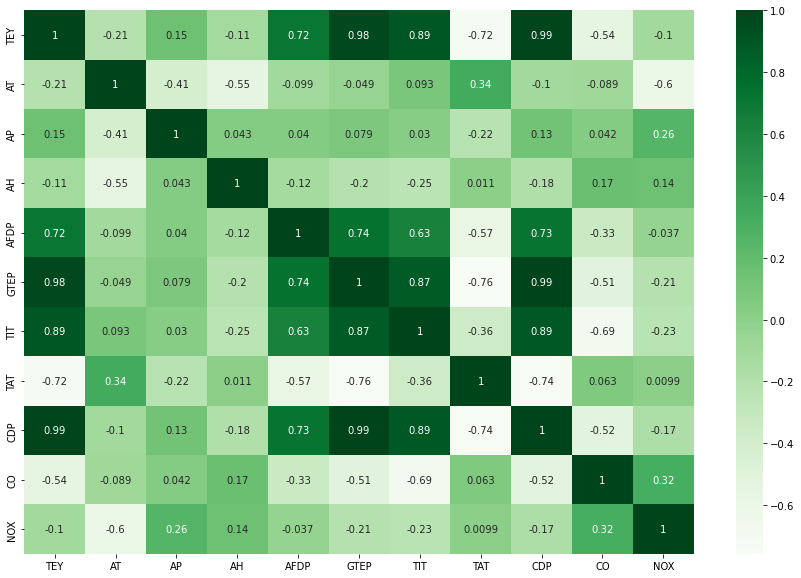

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(Corr,cmap='Greens',annot=True,fmt=".2g")

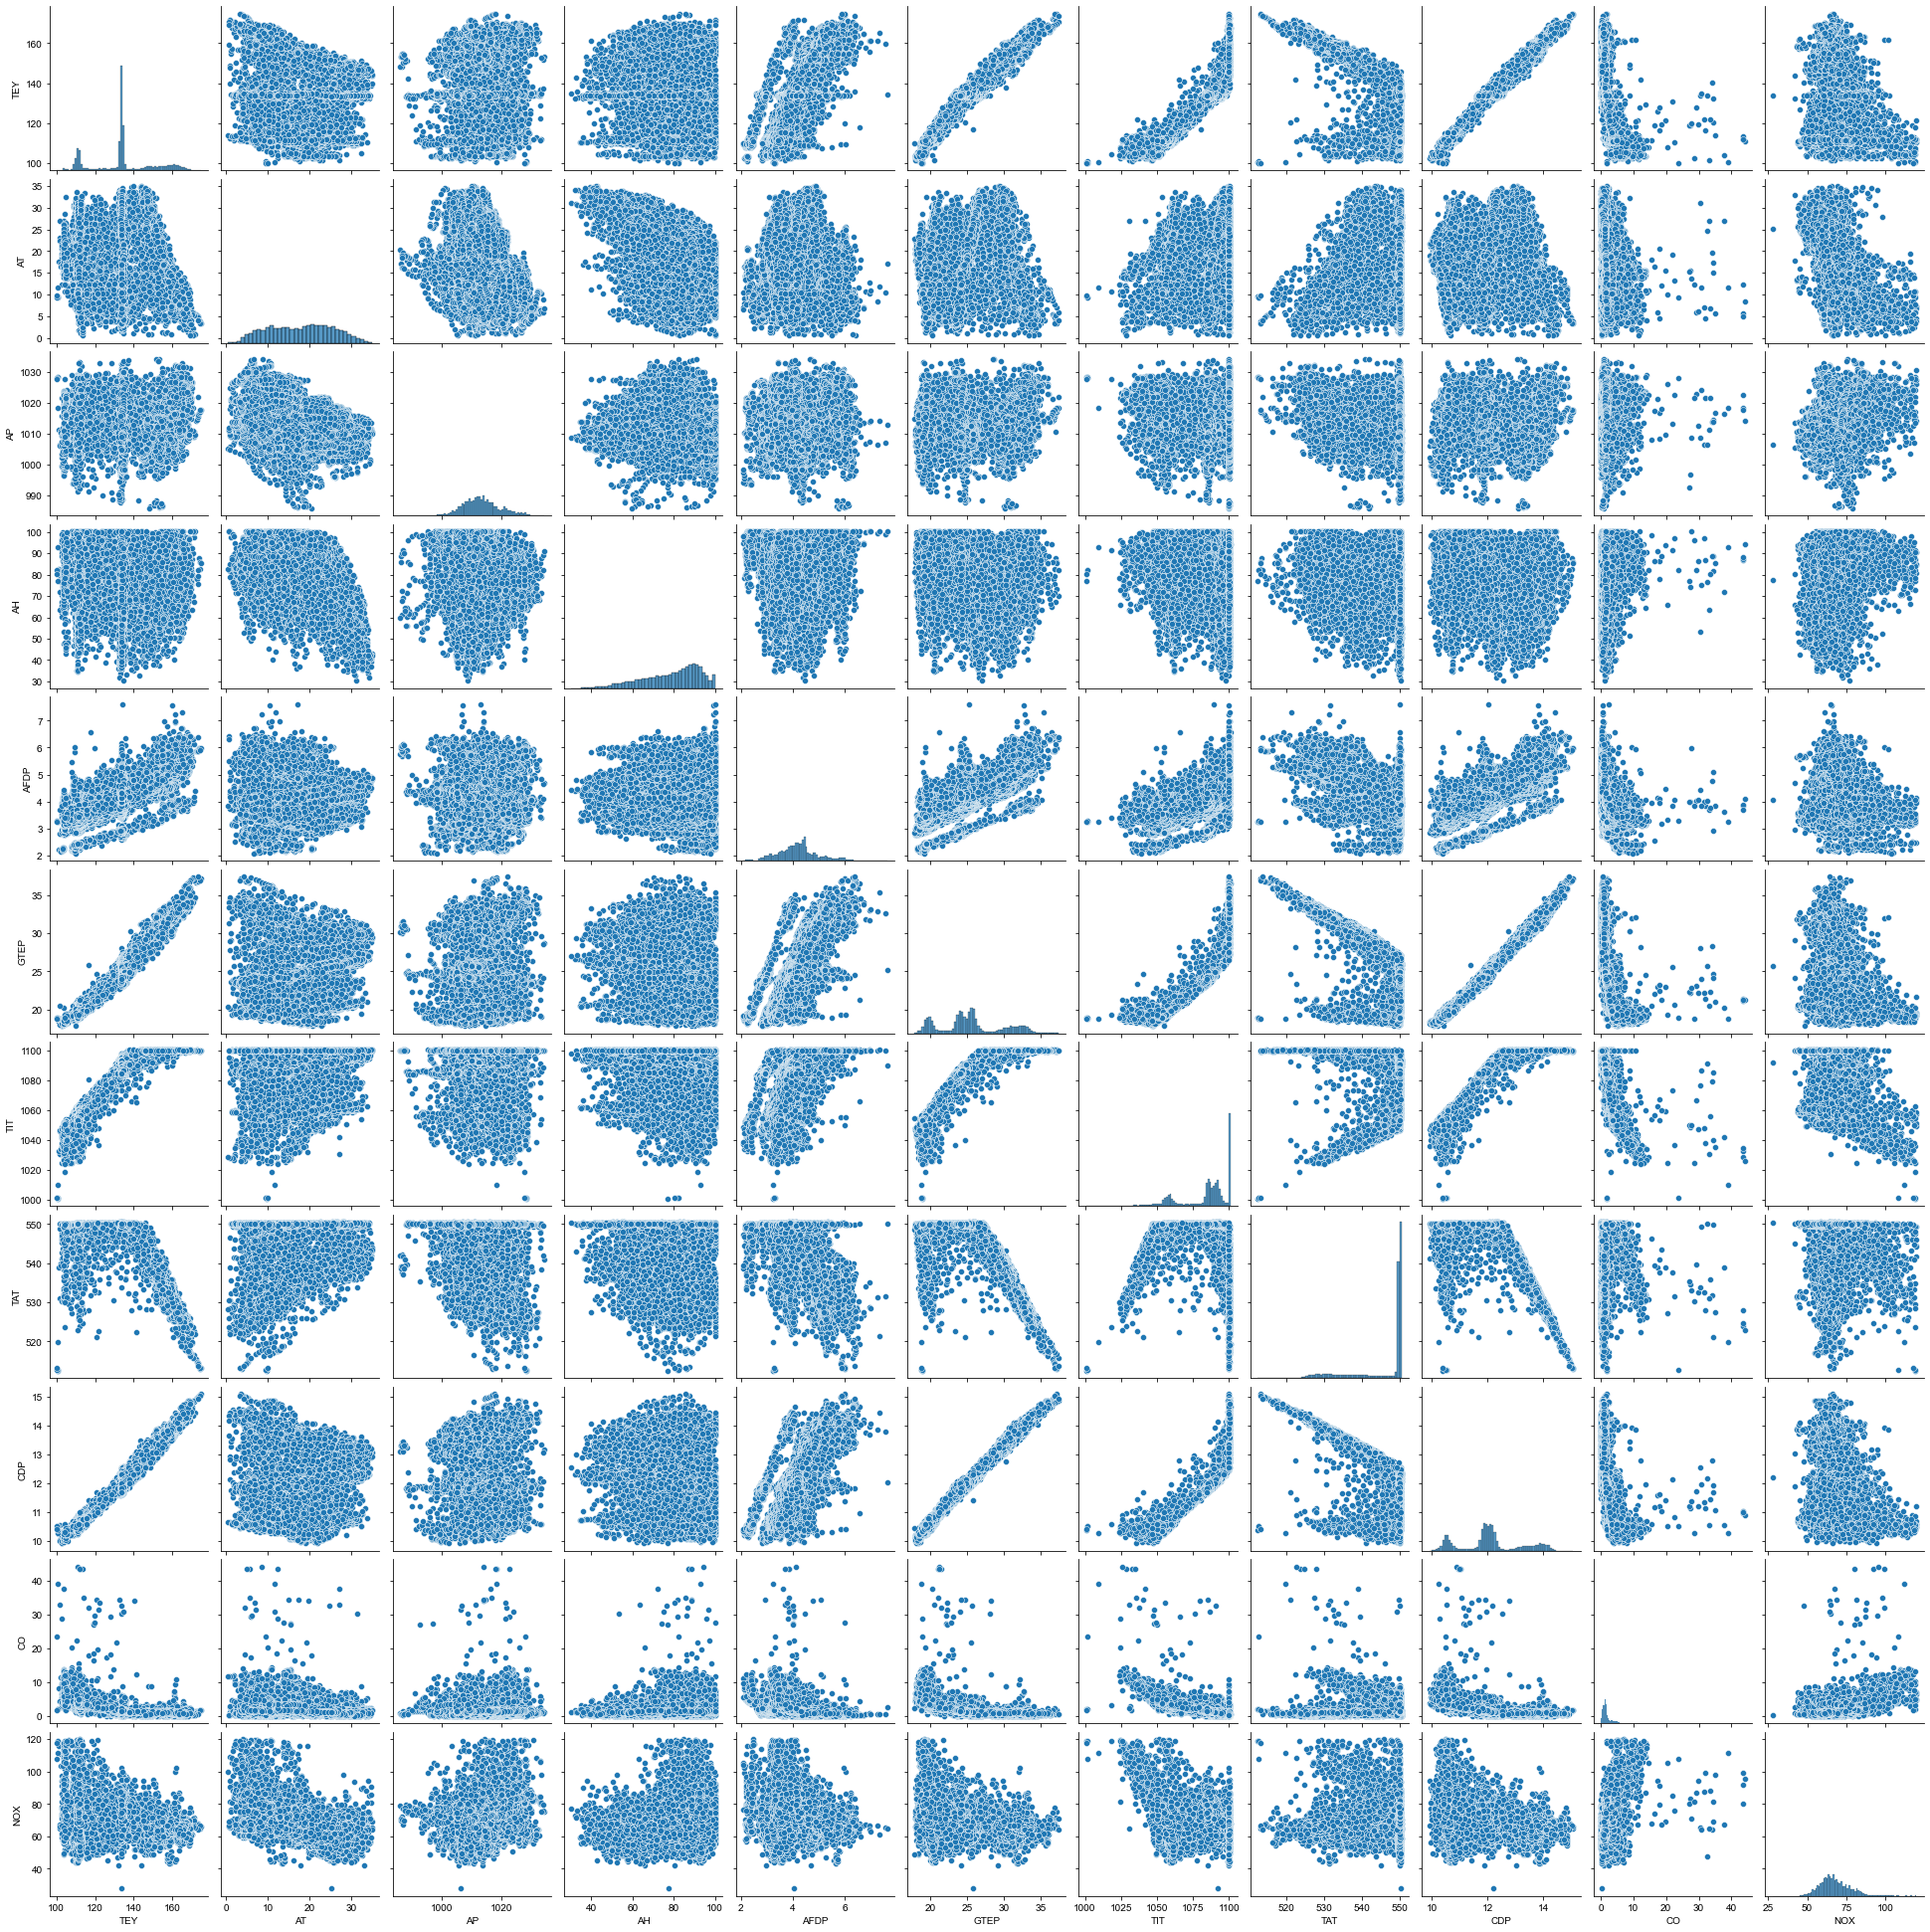

In [10]:
sns.pairplot(Data)
sns.set_style('darkgrid')
plt.show()

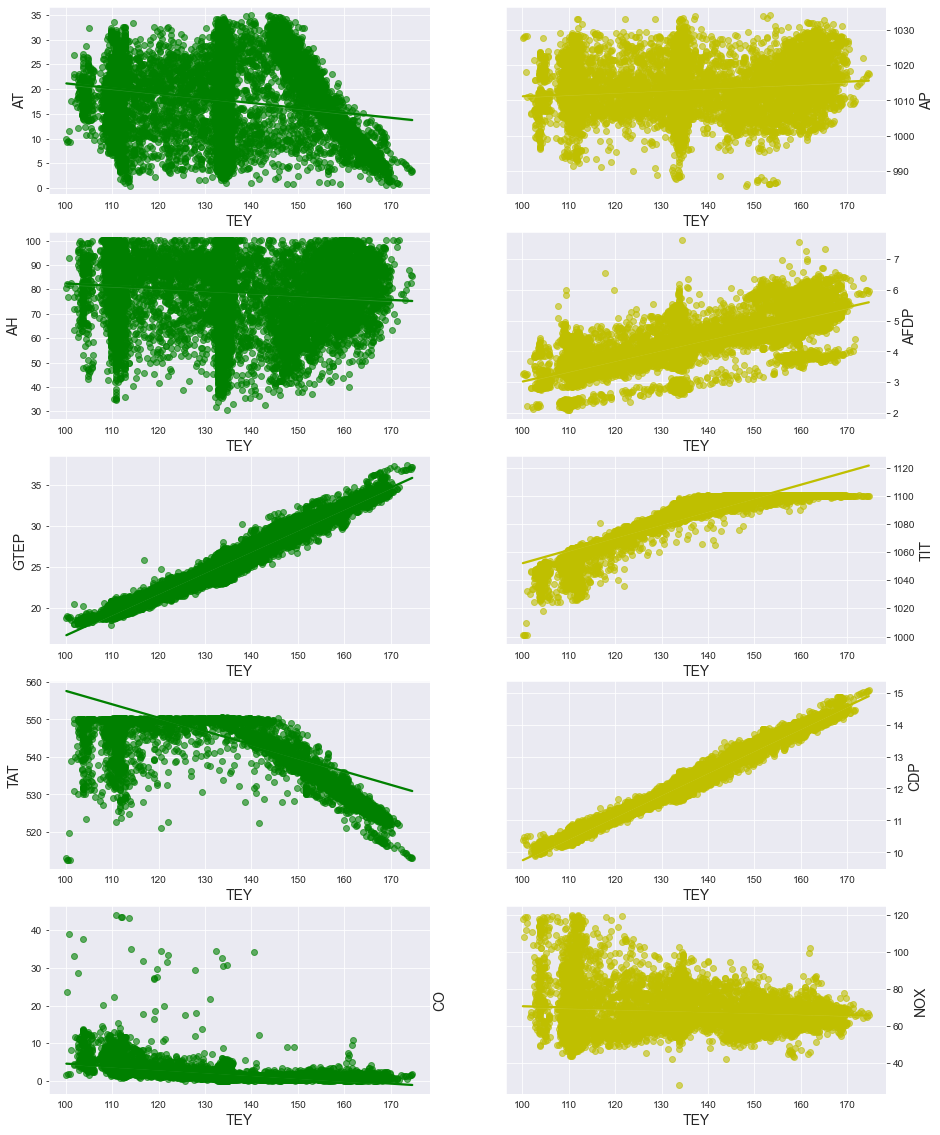

In [11]:
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'TEY', y = 'AT', data = Data, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AP', data = Data, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'AH', data = Data, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AFDP', data = Data, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'GTEP', data = Data, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'TIT', data = Data, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'TAT', data = Data, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'CDP', data = Data, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()

sns.regplot(x = 'TEY', y = 'CO', data = Data, ax = axes[4,0], color = 'g',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")
axes[4,0].yaxis.tick_left()

sns.regplot(x = 'TEY', y = 'NOX', data = Data, ax = axes[4,1], color = 'y',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()


# Declaring Feature Variable & Target Variables By using Feature_Variable Technique

#### First,We will used all Features & Check the highest as well as lowest mutual information with the Target variables by using Mutual Feature in Feature selection technique.
#### Also,we are using SelectKBest in Feature selection to choose top percentile Features which is having highest mutual information gained with the Target variables.

In [12]:
X=Data.drop('TEY',axis=1)
y=Data['TEY']

In [13]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [14]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest

In [15]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


Feature 0: 0.402999
Feature 1: 0.147957
Feature 2: 0.091169
Feature 3: 0.657153
Feature 4: 1.591608
Feature 5: 1.305808
Feature 6: 0.912003
Feature 7: 1.709347
Feature 8: 0.506883
Feature 9: 0.303424


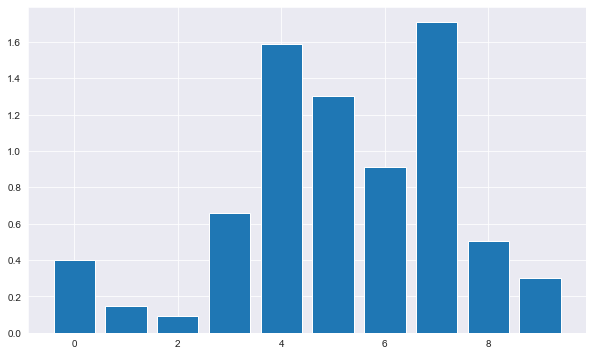

In [16]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


#### As we can see above that,Some the Fetaures don't have much mutual information with the Target Variables.So,We drop that variables & make a good model with Good Score.

# Actual Model Building

In [17]:
X=Data.drop(['TEY','AT','AP','AH','CO','NOX'],axis=1)
y=Data.iloc[:,0]

##### As above said,that the because of the data isn't in scaled for model's Best performance.Hence,we'll scaled first & then we will perform other operations.

### Standardization For Scaling

In [18]:
Scaler=StandardScaler()
Scaler.fit(X)

StandardScaler()

In [19]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]


In [20]:
Scaled_features=Scaler.transform(X)
Data_head=pd.DataFrame(Scaled_features,columns=X.columns)
Data_head

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


### Now, We will check the Mean and Standard Deviation of our scaled data. It should have a Mean '0' and Standard Deviation '1'.

In [21]:
print('Mean' '\n',np.round(Data_head.mean(),1),'\n' 'Standard Devaition','\n',np.round(Data_head.std()),1)


Mean
 AFDP    0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
CDP     0.0
dtype: float64 
Standard Devaition 
 AFDP    1.0
GTEP    1.0
TIT     1.0
TAT     1.0
CDP     1.0
dtype: float64 1


## Splitting the data into Training & Testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((12031, 5), (12031,), (3008, 5), (3008,))

### Now our Data is ready to feed for Neural Network Model

# Model Building 

# Artificial Neural Network Model - Backpropagation


In [24]:
from keras.models import Sequential
from keras.layers import Dense

#### Creating Model

In [25]:
Model=Sequential()
Model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
Model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
Model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))


#### Compiling model

In [26]:
Model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

# Model Training

In [27]:
Model.fit(X_train,y_train,epochs=100,batch_size=40)

Epoch 1/100
301/301 [==============================] - 1s 2ms/step - loss: 1.0115 - mse: 1.0115
Epoch 2/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9983 - mse: 0.9983
Epoch 3/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9985 - mse: 0.9985
Epoch 4/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9992 - mse: 0.9992
Epoch 5/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9995 - mse: 0.9995
Epoch 6/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9989 - mse: 0.9989
Epoch 7/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9989 - mse: 0.9989
Epoch 8/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9988 - mse: 0.9988
Epoch 9/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9987 - mse: 0.9987
Epoch 10/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9991 - mse: 0.9991
Epoch 11/100
301/301 [=================

301/301 [==============================] - 1s 2ms/step - loss: 0.9984 - mse: 0.9984
Epoch 86/100
301/301 [==============================] - 1s 2ms/step - loss: 0.9986 - mse: 0.9986
Epoch 87/100
301/301 [==============================] - 0s 1ms/step - loss: 0.9988 - mse: 0.9988
Epoch 88/100
301/301 [==============================] - 0s 912us/step - loss: 0.9984 - mse: 0.9984
Epoch 89/100
301/301 [==============================] - 0s 854us/step - loss: 0.9983 - mse: 0.9983
Epoch 90/100
301/301 [==============================] - 0s 886us/step - loss: 0.9986 - mse: 0.9986
Epoch 91/100
301/301 [==============================] - 0s 912us/step - loss: 0.9985 - mse: 0.9985
Epoch 92/100
301/301 [==============================] - 0s 974us/step - loss: 0.9987 - mse: 0.9987
Epoch 93/100
301/301 [==============================] - 0s 939us/step - loss: 0.9986 - mse: 0.9986
Epoch 94/100
301/301 [==============================] - 0s 919us/step - loss: 0.9985 - mse: 0.9985
Epoch 95/100
301/301 [=======

# Model Evaluation

In [30]:
Score=Model.evaluate(X_test,y_test)
Model.metrics_names[1]

94/94 [==============================] - 0s 1ms/step - loss: 1.0083 - mse: 1.0083


'mse'